**Importing The Libraries**

In [1]:
!pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

**Reading the Data to dataframe**



In [3]:
car_data = pd.read_csv('car.csv', names = ['Buying_Price', 'Maintenance_Price', 'Number_Of_Doors', 'Number_Of_Persons', 'Boot_Size', 'Safety', 'Acceptability'])

## Exploring the data to get some insights
**Checking the first 5 rows of the data**



In [4]:
car_data.head()

,Buying_Price,Maintenance_Price,Number_Of_Doors,Number_Of_Persons,Boot_Size,Safety,Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


**Checking the bottom 5 rows of the data**

In [5]:
car_data.tail()

,Buying_Price,Maintenance_Price,Number_Of_Doors,Number_Of_Persons,Boot_Size,Safety,Acceptability
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


**Checking the information of the data**

In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Buying_Price       1728 non-null   object
 1   Maintenance_Price  1728 non-null   object
 2   Number_Of_Doors    1728 non-null   object
 3   Number_Of_Persons  1728 non-null   object
 4   Boot_Size          1728 non-null   object
 5   Safety             1728 non-null   object
 6   Acceptability      1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


**Checking the shape of the data**

In [7]:
car_data.shape

(1728, 7)

**Describing the data**


In [8]:
car_data.describe()

,Buying_Price,Maintenance_Price,Number_Of_Doors,Number_Of_Persons,Boot_Size,Safety,Acceptability
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


**Checking fro null values**

In [9]:
car_data.isnull().any()

Buying_Price         False
Maintenance_Price    False
Number_Of_Doors      False
Number_Of_Persons    False
Boot_Size            False
Safety               False
Acceptability        False
dtype: bool

**Checking the unique values in each column**

In [10]:
for col in car_data:
    print(col, '({})'.format(car_data[col].nunique()), ':')
    print(car_data[col].value_counts())

Buying_Price (4) :
vhigh    432
high     432
med      432
low      432
Name: Buying_Price, dtype: int64
Maintenance_Price (4) :
vhigh    432
high     432
med      432
low      432
Name: Maintenance_Price, dtype: int64
Number_Of_Doors (4) :
2        432
3        432
4        432
5more    432
Name: Number_Of_Doors, dtype: int64
Number_Of_Persons (3) :
2       576
4       576
more    576
Name: Number_Of_Persons, dtype: int64
Boot_Size (3) :
small    576
med      576
big      576
Name: Boot_Size, dtype: int64
Safety (3) :
low     576
med     576
high    576
Name: Safety, dtype: int64
Acceptability (4) :
unacc    1210
acc       384
good       69
vgood      65
Name: Acceptability, dtype: int64


**Visaulizing all the features**

graph for Buying_Price: total - 4


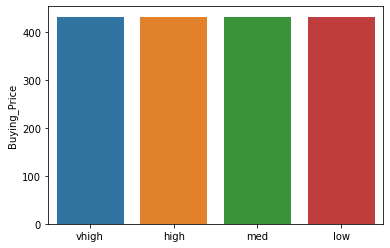

graph for Maintenance_Price: total - 4


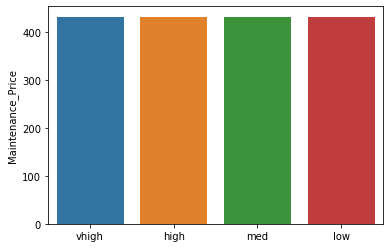

graph for Number_Of_Doors: total - 4


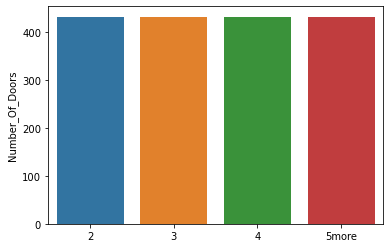

graph for Number_Of_Persons: total - 3


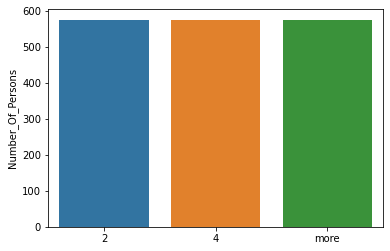

graph for Boot_Size: total - 3


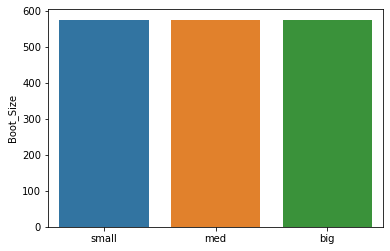

graph for Safety: total - 3


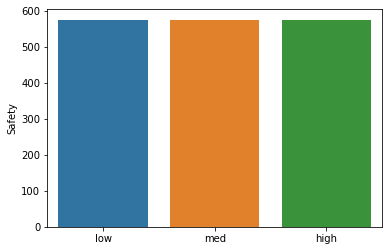

graph for Acceptability: total - 4


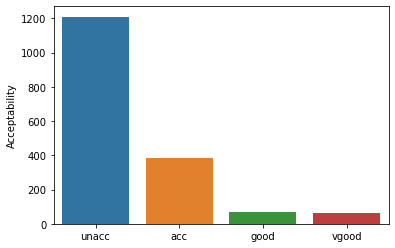

In [11]:
for i in car_data:
    car_num = car_data[i].value_counts()
    print('graph for %s: total - %d' % (i, len(car_num)))
    chart = sns.barplot(x=car_num.index, y=car_num)
    chart.set_xticklabels(chart.get_xticklabels())
    plt.show()

**Encoding the All Column**

In [12]:
car_dataEnc = car_data

In [13]:
car_dataEnc['Acceptability'] = car_data['Acceptability'].replace(['unacc', 'acc', 'good', 'vgood'], [0,1,2,3])

In [14]:
car_dataEnc['Buying_Price'] = car_data['Buying_Price'].replace(['vhigh', 'high', 'med', 'low'], [3,2,1,0])
car_dataEnc['Maintenance_Price'] = car_data['Maintenance_Price'].replace(['vhigh', 'high', 'med', 'low'], [3,2,1,0])
car_dataEnc['Number_Of_Doors'] = car_data['Number_Of_Doors'].replace(['2', '3', '4', '5more'], [0,1,2,3])
car_dataEnc['Number_Of_Persons'] = car_data['Number_Of_Persons'].replace(['2', '4', 'more'], [0,1,2])
car_dataEnc['Boot_Size'] = car_data['Boot_Size'].replace(['small', 'med', 'big'], [0,1,2])
car_dataEnc['Safety'] = car_data['Safety'].replace(['low', 'med', 'high'], [0,1,2])

**Checking the top 5  Encoded data**

In [15]:
car_dataEnc.head()

,Buying_Price,Maintenance_Price,Number_Of_Doors,Number_Of_Persons,Boot_Size,Safety,Acceptability
0,3,3,0,0,0,0,0
1,3,3,0,0,0,1,0
2,3,3,0,0,0,2,0
3,3,3,0,0,1,0,0
4,3,3,0,0,1,1,0


**Checking all the unique values of the encoded table**

In [16]:
for col in car_dataEnc:
    print(col, '({})'.format(car_dataEnc[col].nunique()), ':')
    print(car_dataEnc[col].value_counts())

Buying_Price (4) :
3    432
2    432
1    432
0    432
Name: Buying_Price, dtype: int64
Maintenance_Price (4) :
3    432
2    432
1    432
0    432
Name: Maintenance_Price, dtype: int64
Number_Of_Doors (4) :
0    432
1    432
2    432
3    432
Name: Number_Of_Doors, dtype: int64
Number_Of_Persons (3) :
0    576
1    576
2    576
Name: Number_Of_Persons, dtype: int64
Boot_Size (3) :
0    576
1    576
2    576
Name: Boot_Size, dtype: int64
Safety (3) :
0    576
1    576
2    576
Name: Safety, dtype: int64
Acceptability (4) :
0    1210
1     384
2      69
3      65
Name: Acceptability, dtype: int64


**Visualizing the encoded data**

graph for Buying_Price: total - 4


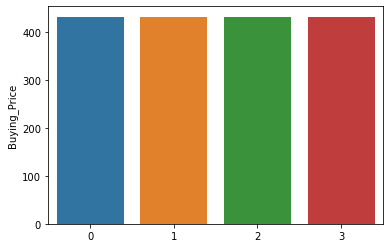

graph for Maintenance_Price: total - 4


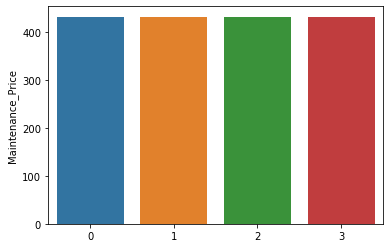

graph for Number_Of_Doors: total - 4


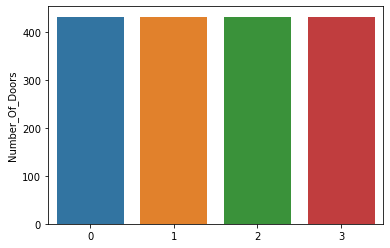

graph for Number_Of_Persons: total - 3


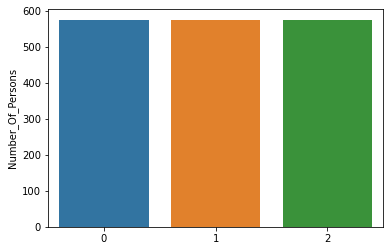

graph for Boot_Size: total - 3


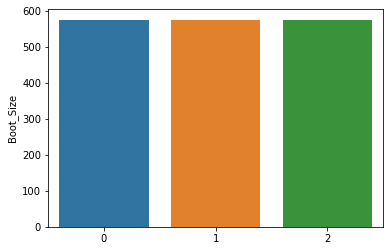

graph for Safety: total - 3


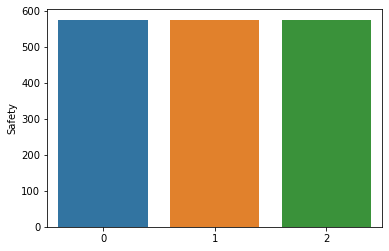

graph for Acceptability: total - 4


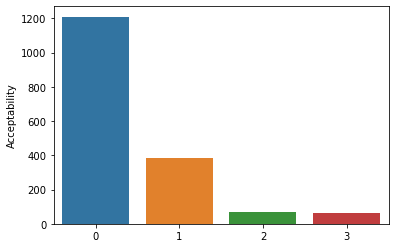

In [17]:
for i in car_dataEnc:
    car_plot = car_dataEnc[i].value_counts()
    print('graph for %s: total - %d' % (i, len(car_plot)))
    chart = sns.barplot(x=car_plot.index, y=car_plot)
    chart.set_xticklabels(chart.get_xticklabels())
    plt.show()

**Using train_test_split to split and train the data**

In [18]:
X = car_dataEnc.drop('Acceptability', axis = 1)
y = car_dataEnc['Acceptability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 99)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Building and Training the Neural Network**

In [19]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(8,activation='relu', input_shape=(6,)))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

**To Compile the model**

In [20]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

**To view the summary of the Neural Network**


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 56        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
Total params: 92
Trainable params: 92
Non-trainable params: 0
_________________________________________________________________


In [22]:
class_weights = {0:1, 1:3, 2:18, 3:19}

history = model.fit(X_train, y_train, batch_size = 8, epochs = 50, verbose = 2, class_weight = class_weights, validation_split = 0.3)

Epoch 1/50
106/106 - 1s - loss: 3.7369 - accuracy: 0.4314 - val_loss: 1.1769 - val_accuracy: 0.5455 - 1s/epoch - 10ms/step
Epoch 2/50
106/106 - 0s - loss: 3.4331 - accuracy: 0.5579 - val_loss: 1.0676 - val_accuracy: 0.6584 - 208ms/epoch - 2ms/step
Epoch 3/50
106/106 - 0s - loss: 3.1949 - accuracy: 0.6182 - val_loss: 0.9636 - val_accuracy: 0.7025 - 215ms/epoch - 2ms/step
Epoch 4/50
106/106 - 0s - loss: 2.9808 - accuracy: 0.6548 - val_loss: 0.8738 - val_accuracy: 0.7410 - 205ms/epoch - 2ms/step
Epoch 5/50
106/106 - 0s - loss: 2.7922 - accuracy: 0.6868 - val_loss: 0.8040 - val_accuracy: 0.7631 - 200ms/epoch - 2ms/step
Epoch 6/50
106/106 - 0s - loss: 2.6364 - accuracy: 0.7057 - val_loss: 0.7439 - val_accuracy: 0.7741 - 212ms/epoch - 2ms/step
Epoch 7/50
106/106 - 0s - loss: 2.4912 - accuracy: 0.7293 - val_loss: 0.6986 - val_accuracy: 0.7824 - 196ms/epoch - 2ms/step
Epoch 8/50
106/106 - 0s - loss: 2.3623 - accuracy: 0.7470 - val_loss: 0.6611 - val_accuracy: 0.7824 - 197ms/epoch - 2ms/step
Ep

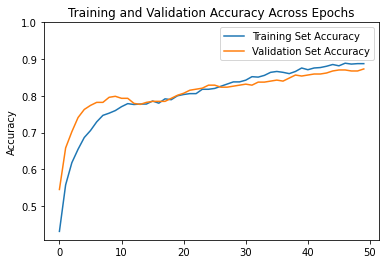

In [23]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

plt.plot(accuracy, label = 'Training Set Accuracy')
plt.plot(validation_accuracy, label = 'Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

<function matplotlib.pyplot.legend(*args, **kwargs)>

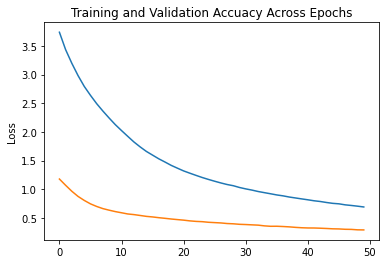

In [24]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.plot(loss, label = 'Training Set Loss')
plt.plot(validation_loss, label = 'Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and Validation Accuacy Across Epochs')
plt.legend

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis = 1)

17/17 [==============================] - 0s 1ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

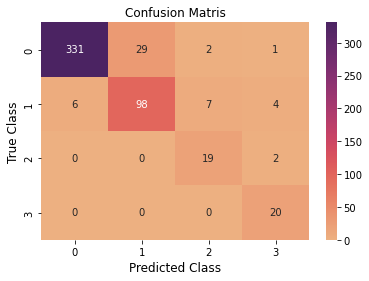

In [27]:
confusion_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(confusion_matrix, cmap='flare', annot=True, fmt='d')

plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('True Class', fontsize=12)
plt.title('Confusion Matris', fontsize = 12)

plt.show

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95       363
           1       0.77      0.85      0.81       115
           2       0.68      0.90      0.78        21
           3       0.74      1.00      0.85        20

    accuracy                           0.90       519
   macro avg       0.79      0.92      0.85       519
weighted avg       0.91      0.90      0.91       519

